## Which System performed better?

In [88]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import plotly.graph_objects as go

#load results, trainig and evaluation
#RS1 training log
with open('train_log.d','rb') as f:
    train_log1=dill.load(f)
#RS2 training log    
with open('train_log2.d','rb') as f:
    train_log2=dill.load(f)
#evaluation log
with open('evaluation_log.d','rb') as f:
    evaluation_log=dill.load(f)      

In [89]:
train_log1.head(1)

,Date,Data,Algo,Tunning,Tunning_time,Best_parameters,Tunning_RMSE,Train_time,Leave_one_out
1,2021-10-13 16:16:19.707387,Quantity,SVD,RandomizedSearchCV,0.561669,"{'n_factors': 10, 'n_epochs': 10, 'lr_all': 0....",29.777515,27.82,False


In [90]:
train_log2.head(1)

,Date,Data,Algo,Tunning,Tunning_time,Tuning_Samples,Parameters,Tuning_Metric,Tuning_score,Leave_one_out
1,2021-12-09 16:28:51.768367,Quantity,LightFM,True,229.666846,12,"{'no_components': 43, 'learning_schedule': 'ad...",Precision,0.487707,False


In [91]:
#replace null, with 0
evaluation_log=evaluation_log.replace('-','0')
#dtypes to numeric
for column_name in ['Precision@N','Recall@N', 'Hit_rate', 'Compute_time', 'Unique_TopN', 'Unique_Products']:
  evaluation_log[column_name]= pd.to_numeric(evaluation_log[column_name])
evaluation_log.dtypes
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]
# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]
# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]
cm = sns.light_palette("green", as_cmap=True)

#preview
# evaluation_log.sort_values(by='Hit_rate', ascending=False)[evaluation_log['Leave_one_out']== False].head(1)

### Best Recommendation System: Surprise or **LightFM**

### LightFM Evaluation
*(Leave One Out Results, not included)*

***
LightFM is a Python library for Recommendation System implementations. 
It offers collaborative filtering techniques and can support hybrid module as well (content filtering, with user/product metadata processing).
Its algorythm uses embeddings as to predict the "missing" user/product ratings and recommends the products with the highest predicting value as output.
This project is limited to only collaborative filtering techniques due to data limitations.
***

In [92]:
light=evaluation_log.loc[(evaluation_log['Algo']=='LightFM') & (evaluation_log['Leave_one_out']==False)]
(light[light['Leave_one_out']==False].sort_values('Hit_rate',ascending=False).reset_index().style
 .background_gradient(cmap=cm, subset=['Precision@N','Recall@N','Hit_rate','Unique_TopN','Unique_Products'])
 .highlight_max(subset=['Precision@N','Recall@N','Hit_rate','Unique_TopN','Unique_Products'],color='orange')
 .set_caption('LightFM Results')
 .format({'Hit_rate': "{:.2}",'Precision@N': "{:.2}",'Recall@N': "{:.2}",
 'Compute_time': "{:.2}",'Unique_TopN': "{:.2}",'Unique_Products': "{:.2}",'LOO_Rate': "{:.2}"})
 .set_table_styles(styles))


,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,3.7e+02,0.99,0.29,0
1,13,2021-12-10 00:35:53.165678,Frequency2,LightFM,False,5,0.5,0.38,0.6,2990,1,4948,4.8e+02,1.0,0.29,0
2,12,2021-12-10 00:16:31.641496,Frequency1,LightFM,False,5,0.5,0.38,0.59,2938,1,4948,4.2e+02,1.0,0.28,0
3,18,2021-12-10 10:40:13.579634,Frequency2,LightFM,False,5,0.51,0.39,0.53,2608,1,4948,3.5e+02,1.0,0.76,0
4,11,2021-12-10 00:01:02.185161,Frequency1,LightFM,False,5,0.51,0.39,0.48,2357,1,4948,4.5e+02,1.0,0.81,0
5,38,2022-01-03 15:03:56.366762,Quantity,LightFM,False,5,0.49,0.38,0.48,2359,1,4948,3.4e+02,0.99,0.88,0
6,3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,3e+02,1.0,0.54,0
7,20,2021-12-10 11:08:08.691002,new_Frequency1,LightFM,False,5,0.5,0.39,0.46,2280,1,4948,3.4e+02,0.99,0.84,0
8,1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,3.2e+02,1.0,0.57,0
9,2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,3.6e+02,1.0,0.57,0


In [93]:
#find highest and lowest evaluation rate score for each rating column type
data_max_min=light[['Data','Precision@N','Recall@N','Hit_rate','Unique_TopN','Unique_Products']].groupby('Data').agg(['min', 'max'])


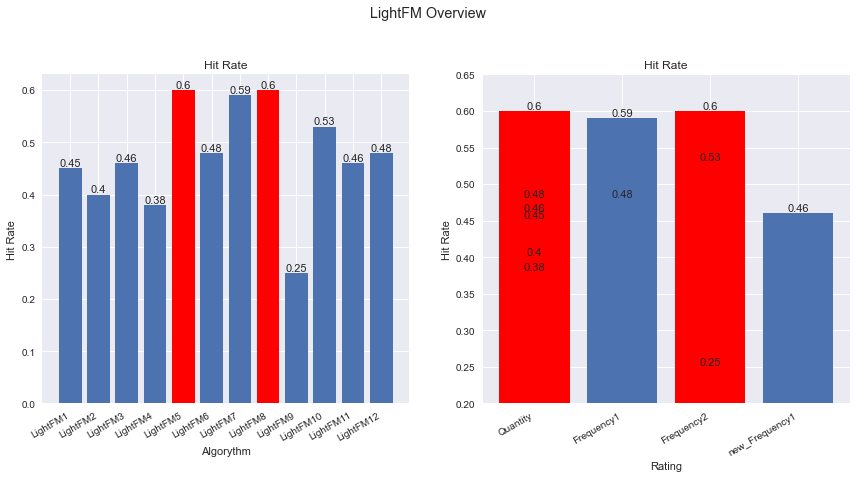

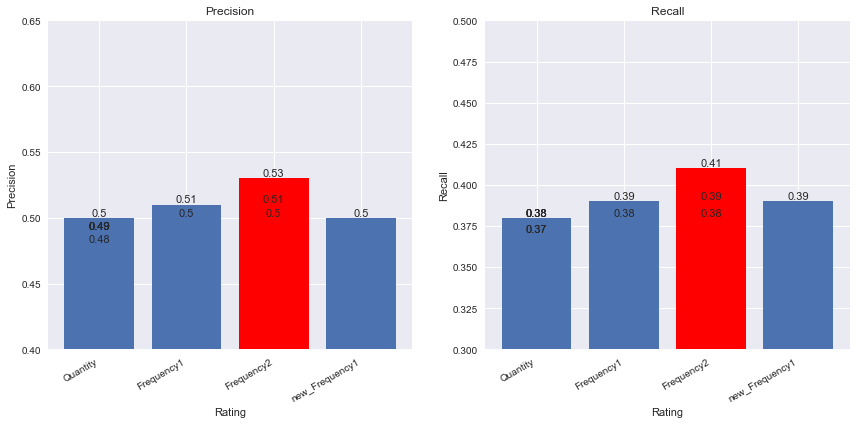

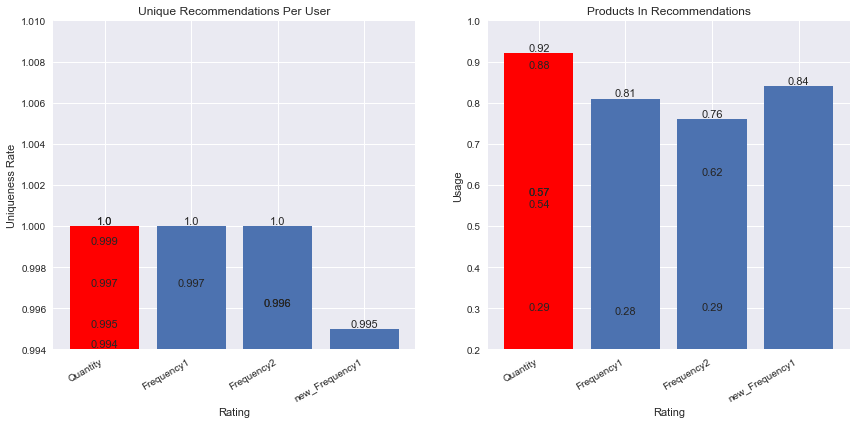

In [136]:
def system_overview2(light):
    """
    LightFM system PLOTS 
    """
    plt.style.use(plt.style.available[9])
    # plt.grid(color='w', linestyle='solid')
    
    #create index list
    light_x=[]
    for i in range(1,light.shape[0]+1):
        light_x.append('LightFM{0}'.format(i))
    
    light=light.reset_index()

    fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,6))
    ax1.bar(x=light_x, height=light['Hit_rate'].values)
    #find max
    max_index=light[light['Hit_rate']==light['Hit_rate'].max()].index
    max_score=light['Hit_rate'].max()
    ax1.bar(x='LightFM{0}'.format(max_index[0]+1),height=max_score, color='r')
    ax1.bar(x='LightFM{0}'.format(max_index[1]+1),height=max_score, color='r')


    #annotation
    y=light['Hit_rate'].values
    x=light_x
    for a,b in zip(x,y): 
        ax1.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax1.set_title("Hit Rate", fontsize=12)
    ax1.set_xlabel('Algorythm')
    ax1.set_ylabel('Hit Rate')
 
    fig.autofmt_xdate()

    ax2.bar(x=light['Data'], height=light['Hit_rate'])
    #find max
    max_rating_column=light[light['Hit_rate']==light['Hit_rate'].max()]['Data'].values
    max_score=light['Hit_rate'].max()
    ax2.bar(x=max_rating_column[0], height=max_score, color='r')
    ax2.bar(x=max_rating_column[1],height=max_score, color='r')

    ax2.set_ylim((0.2,0.65))
    #annotation
    y=light['Hit_rate'].values
    x=light['Data'].values
    for a,b in zip(x,y): 
        ax2.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax2.set_title("Hit Rate", fontsize=12)
    ax2.set_xlabel('Rating')
    ax2.set_ylabel('Hit Rate')
    
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    fig.suptitle('LightFM Overview',y=1.1,fontsize='x-large')

    plt.show();

    fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,6))

    ax3.bar(x=light['Data'], height=light['Precision@N'])
    #find max
    max_data=light[light['Precision@N']==light['Precision@N'].max()]['Data'].values[0]
    max_score=light['Precision@N'].max()
    ax3.bar(x=max_data,height=max_score, color='red')
    ax3.set_ylim((0.4,0.65))

    #annotation
    y=light['Precision@N'].values
 
    for a,b in zip(x,y): 
        ax3.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax3.set_title("Precision", fontsize=12)
    ax3.set_xlabel('Rating')
    ax3.set_ylabel('Precision')
    fig.autofmt_xdate()



    ax4.bar(x=light['Data'], height=light['Recall@N'])
    #find max
    max_data=light[light['Recall@N']==light['Recall@N'].max()]['Data'].values[0]
    max_score=light['Recall@N'].max()
    ax4.bar(x=max_data,height=max_score, color='r')
    ax4.set_ylim((0.3,0.5))

    #annotation
    y=light['Recall@N'].values
    for a,b in zip(x,y): 
        ax4.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax4.set_title("Recall", fontsize=12)
    ax4.set_xlabel('Rating')
    ax4.set_ylabel('Recall')
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()


    fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,6))

    ax5.bar(x=light['Data'], height=light['Unique_TopN'])
    #find max
    max_data=light[light['Unique_TopN']==light['Unique_TopN'].max()]['Data'].values[0]
    max_score=light['Unique_TopN'].max()
    ax5.bar(x=max_data,height=max_score, color='r')
    ax5.set_ylim((0.994,1.010))
    #annotation
    y=light['Unique_TopN'].values
    for a,b in zip(x,y): 
        ax5.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax5.set_title("Unique Recommendations Per User", fontsize=12)
    ax5.set_xlabel('Rating')
    ax5.set_ylabel('Uniqueness Rate')
    fig.autofmt_xdate()



    ax6.bar(x=light['Data'], height=light['Unique_Products'])
    #find max
    max_data=light[light['Unique_Products']==light['Unique_Products'].max()]['Data'].values[0]
    max_score=light['Unique_Products'].max()
    ax6.bar(x=max_data,height=max_score, color='r')
    ax6.set_ylim((0.2,1.0))
    #annotation
    y=light['Unique_Products'].values
    for a,b in zip(x,y): 
        ax6.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax6.set_title("Products In Recommendations", fontsize=12)
    ax6.set_xlabel('Rating')
    ax6.set_ylabel('Usage')
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.1)
    plt.show()
    return None   
system_overview2(light=light)

##### Best Run Details:

In [95]:
#best LightFM Run
data_max=data_max_min[data_max_min.columns[:][[1,3,5,7,9]]].style\
      .format('{:.2f}')\
      .highlight_max(color = 'coral')\
      .highlight_min(color = 'lightgreen')\
      .highlight_null(null_color='yellow')
data_max

,Precision@N,Recall@N,Hit_rate,Unique_TopN,Unique_Products
,max,max,max,max,max
Data,,,,,
Frequency1,0.51,0.39,0.59,1.00,0.81
Frequency2,0.53,0.41,0.60,1.00,0.76
Quantity,0.50,0.38,0.60,1.00,0.92
new_Frequency1,0.50,0.39,0.46,0.99,0.84


In [96]:
#best runs
evaluation_log[(evaluation_log['Leave_one_out']==False) & 
 (evaluation_log['Algo']=='LightFM')].sort_values(by='Hit_rate',ascending=False).reset_index()[:2].style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])


,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.50,0.38,0.60,2973,1,4948,365.30,0.99,0.29,0
1,13,2021-12-10 00:35:53.165678,Frequency2,LightFM,False,5,0.50,0.38,0.60,2990,1,4948,482.18,1.00,0.29,0


In [97]:
light_train=train_log2[train_log2['Leave_one_out']==False]
#Evaluation Runs using Frequency2 data
results_max=evaluation_log[(evaluation_log['Data']=='Frequency2') & (evaluation_log['Leave_one_out']==False) & 
                            (evaluation_log['Algo']=='LightFM')].reset_index()
results_max.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])                           

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,13,2021-12-10 00:35:53.165678,Frequency2,LightFM,False,5,0.50,0.38,0.60,2990,1,4948,482.18,1.00,0.29,0
1,14,2021-12-10 01:00:08.886689,Frequency2,LightFM,False,5,0.53,0.41,0.25,1256,1,4948,534.19,1.00,0.62,0
2,18,2021-12-10 10:40:13.579634,Frequency2,LightFM,False,5,0.51,0.39,0.53,2608,1,4948,347.12,1.00,0.76,0


In [98]:
#find highest Hit Rate index
hhr_index=results_max[(results_max['Hit_rate']==0.6) & (results_max['Data']=='Frequency2')].index[0]

In [99]:
#Training Runs using Quantity data 
run_details=light_train.loc[(light_train['Data']=='Frequency2')].reset_index().loc[hhr_index]
run_details

index                                          9
Date                  2021-12-10 00:35:53.070734
Data                                  Frequency2
Algo                                     LightFM
Tunning                                    False
Tunning_time                                   -
Tuning_Samples                                 -
Parameters        {'epochs': 30, 'loss': 'warp'}
Tuning_Metric                                  -
Tuning_score                                   -
Leave_one_out                              False
Name: 0, dtype: object

In [100]:
run_details['Parameters']

{'epochs': 30, 'loss': 'warp'}

***
To our surprise, less is better when it comes to LighFM model. Both highest Hit Rate scores were made using, loss function as **warp** and 30 epochs. Regardless of the data type, Frequency2 or Quantity, simplicity seems to do the trick! 

The rest parameters have their default values, which are: 
* number of components:   10,
* learning rate schedule: adagrad, adadelta,  
* learning rate:          0.05,  
* item alpha:             0.0,  
* user alpha:             0.0,  
* max sampled:            10
 
***

##### Alternatively:

In [101]:
#Evaluation Runs using Quantity data
results_max=evaluation_log[(evaluation_log['Data']=='Quantity') & (evaluation_log['Leave_one_out']==False) & 
                            (evaluation_log['Algo']=='LightFM')].reset_index()
results_max.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])                         

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.00,0.57,0
1,2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.40,1971,1,4948,358.38,1.00,0.57,0
2,3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.00,0.54,0
3,4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,1.00,0.92,0
4,5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.50,0.38,0.60,2973,1,4948,365.30,0.99,0.29,0
5,38,2022-01-03 15:03:56.366762,Quantity,LightFM,False,5,0.49,0.38,0.48,2359,1,4948,344.49,0.99,0.88,0


In [102]:
#find highest Hit Rate index
hhr_index=results_max[(results_max['Hit_rate']==0.6) & (results_max['Data']=='Quantity')].index[0]

In [103]:
#Training Runs using Quantity data 
run_details=light_train.loc[(light_train['Data']=='Quantity')].loc[hhr_index+2]
run_details

Date                  2021-12-09 23:30:59.326916
Data                                    Quantity
Algo                                     LightFM
Tunning                                    False
Tunning_time                                   -
Tuning_Samples                                 -
Parameters        {'epochs': 30, 'loss': 'warp'}
Tuning_Metric                                  -
Tuning_score                                   -
Leave_one_out                              False
Name: 6, dtype: object

In [104]:
run_details['Parameters']

{'epochs': 30, 'loss': 'warp'}

##### Lowest Rate Run Details:

In [105]:
#worst LightFM run
data_min=data_max_min[data_max_min.columns[:][[0,2,4,6,8]]].style\
      .format('{:.2f}')\
      .highlight_max(color = 'lightgreen')\
      .highlight_min(color = 'coral')\
      .highlight_null(null_color='yellow')
data_min

#Most important rate is hit rate so accorging to following table results, the weakest rate was: 0,25(25%) which uses Frequency2
#as rating column.


,Precision@N,Recall@N,Hit_rate,Unique_TopN,Unique_Products
,min,min,min,min,min
Data,,,,,
Frequency1,0.50,0.38,0.48,1.00,0.28
Frequency2,0.50,0.38,0.25,1.00,0.29
Quantity,0.48,0.37,0.38,0.99,0.29
new_Frequency1,0.50,0.39,0.46,0.99,0.84


In [106]:
#Evaluation Runs using Quantity data
results_min=evaluation_log[(evaluation_log['Data']=='Frequency2') & (evaluation_log['Leave_one_out']==False) & 
                            (evaluation_log['Algo']=='LightFM')].reset_index()
results_min.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,13,2021-12-10 00:35:53.165678,Frequency2,LightFM,False,5,0.50,0.38,0.60,2990,1,4948,482.18,1.00,0.29,0
1,14,2021-12-10 01:00:08.886689,Frequency2,LightFM,False,5,0.53,0.41,0.25,1256,1,4948,534.19,1.00,0.62,0
2,18,2021-12-10 10:40:13.579634,Frequency2,LightFM,False,5,0.51,0.39,0.53,2608,1,4948,347.12,1.00,0.76,0


In [107]:
#Find lowest Hit Rate index
hhr_index=results_min[(results_min['Hit_rate']==0.25) & (results_min['Data']=='Frequency2')].index[0]


In [108]:
#Training Runs using Frequency2 data 
run_details=light_train.loc[(light_train['Data']=='Frequency2')].reset_index().loc[hhr_index]
run_details

index                                                            10
Date                                     2021-12-10 01:00:08.758762
Data                                                     Frequency2
Algo                                                        LightFM
Tunning                                                        True
Tunning_time                                                 490.19
Tuning_Samples                                                   12
Parameters        {'no_components': 54, 'learning_schedule': 'ad...
Tuning_Metric                                             Precision
Tuning_score                                                   0.53
Leave_one_out                                                 False
Name: 1, dtype: object

In [109]:
run_details['Parameters']

{'no_components': 54,
 'learning_schedule': 'adadelta',
 'loss': 'bpr',
 'learning_rate': 0.10191660788999382,
 'item_alpha': 2.7764289102227284e-08,
 'user_alpha': 1.7419439847715242e-08,
 'max_sampled': 12,
 'num_epochs': 43}

***
Frequency2 values are concentrated around (0,1)* , it is clear that **bpr** loss function was not the best choice out of : wrap, wrap_kos, bpr.

* BPR: Bayesian Personalised Ranking pairwise loss. Maximises the prediction difference between a positive example and a randomly chosen negative example.  Useful when only positive interactions are present and optimising ROC AUC is desired.

* WARP: Weighted Approximate-Rank Pairwise loss. Maximises the rank of positive examples by repeatedly sampling negative examples until rank violating one is found. Useful when only positive interactions are present and optimising the top of the recommendation list (precision@k) is desired.

* k-OS WARP: k-th order statistic loss. A modification of WARP that uses the k-th positive example for any given user as a basis for pairwise updates.

**for more details about the rating columns look into Data_Preprocessing.ipynb*
***

### Surprise Evaluation
*(Leave One Out results not icluded*)

 ***
Surprise is a mainstream Python library used for simple recommendation collaborative system implementations.
It supports a plethora of algorithms from **KNN neighbor models, matrix factorization techniques to simple algorithms like BaselineOnly**.
What makes Surprise stand out from other recommender system libraries is the different models and straightforward building it has, which is based on Scikit-Learn. Although it did not produce the most promising results it is the best choice when it comes to new-comers to learn the basics not only from a theoretical point of view but to also comprehend each step of the execution process.

In detail Surprise supports the following algorithms:
* Normal Predictor
* Baseline Only
* KNN Basic
* KNN With Z-Score
* KNN With Means
* KNN Baseline 
* SVD
* SVDpp
* NMF
* Slope One
* Co Clusterng
***

In [110]:
surprise=evaluation_log.loc[(evaluation_log['Algo']!='LightFM') & (evaluation_log['Leave_one_out']==False)]
(surprise.sort_values('Hit_rate',ascending=False).reset_index().style
 .background_gradient(cmap=cm, subset=['Precision@N','Recall@N','Hit_rate','Unique_TopN','Unique_Products'])
 .highlight_max(subset=['Precision@N','Recall@N','Hit_rate','Unique_TopN','Unique_Products'],color='orange')
 .set_caption('Surprise Results')
 .format({'Hit_rate': "{:.2}",'Precision@N': "{:.2}",'Recall@N': "{:.2}",
 'Compute_time': "{:.2}",'Unique_TopN': "{:.2}",'Unique_Products': "{:.2}",'LOO_Rate': "{:.2}"})
 .set_table_styles(styles)) 

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,3.6e+02,0.12,0.06,0
1,9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,4.1e+02,0.26,0.05,0
2,27,2021-12-11 18:41:31.683068,Frequency1,KNNBasic,False,5,0.07,0.11,0.31,1530,1,4948,3.7e+02,0.97,0.29,0
3,24,2021-12-10 17:14:14.326315,new_Frequency1,KNNBasic,False,5,0.07,0.1,0.3,1473,1,4948,3.5e+02,0.95,0.11,0
4,25,2021-12-10 17:27:17.934444,new_Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1435,1,4948,3.1e+02,0.026,0.04,0
5,37,2022-01-03 14:54:17.867142,Quantity,BaselineOnly,False,5,0.07,0.1,0.29,1455,1,4948,4.2e+02,0.03,0.04,0
6,15,2021-12-10 01:21:27.032997,Frequency1,KNNBaseline,False,5,0.07,0.1,0.29,1415,1,4948,3.4e+02,0.9,0.37,0
7,10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,4.5e+02,0.028,0.04,0
8,16,2021-12-10 10:13:37.243523,Frequency1,SVD,False,5,0.06,0.1,0.28,1364,1,4948,3.1e+02,0.68,0.45,0
9,26,2021-12-10 17:52:14.014046,new_Frequency1,SVD,False,5,0.06,0.1,0.28,1373,1,4948,3.2e+02,0.1,0.09,0


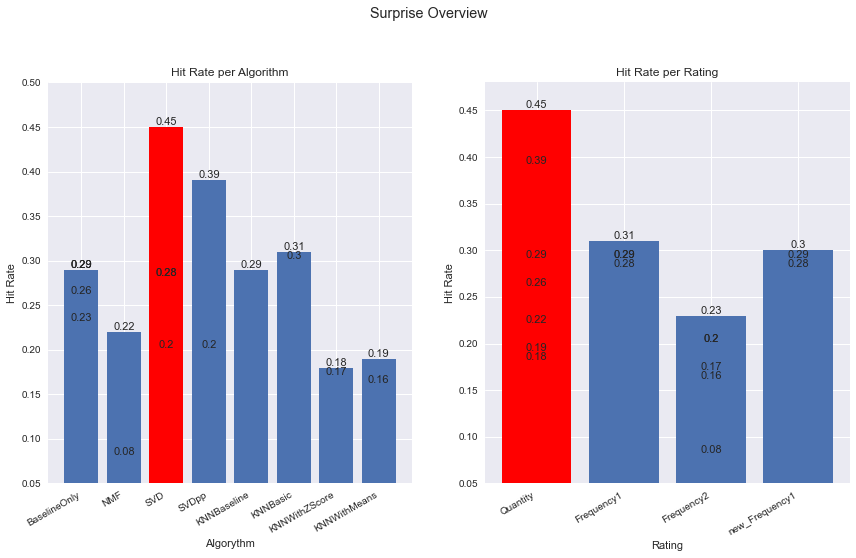

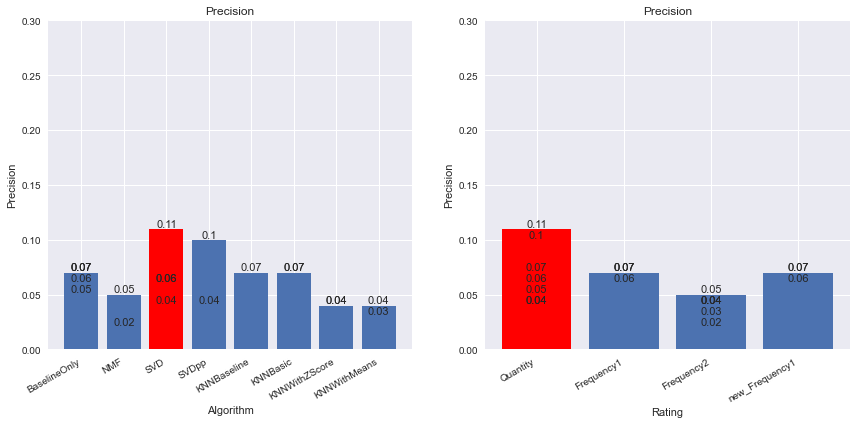

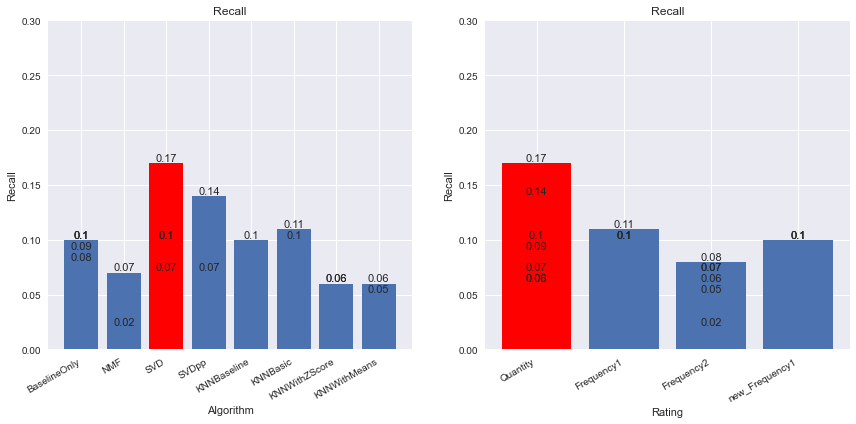

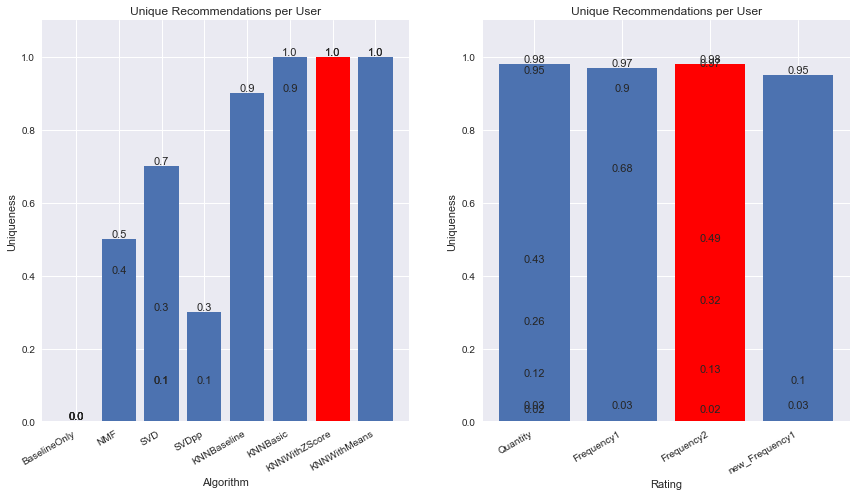

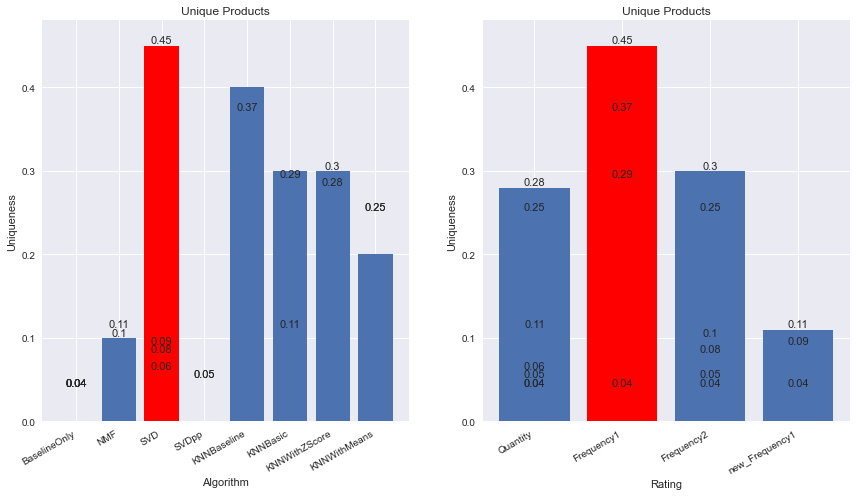

In [111]:
def system_overview1(surprise):
    """
    Surprise system PLOTS 
    """
    
    plt.style.use(plt.style.available[9])
    # plt.grid(color='w', linestyle='solid')

    fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,7))
    ax1.bar(x=surprise['Algo'], height=surprise['Hit_rate'].values)
    #find max
    max_index=surprise[surprise['Hit_rate']==surprise['Hit_rate'].max()].index[0]
    max_score=surprise['Hit_rate'].max()
    ax1.bar(x=surprise['Algo'].loc[max_index],height=max_score, color='r')
    ax1.set_ylim((0.05,0.5))
    #annotation
    y=surprise['Hit_rate'].values
    x=surprise['Algo'].values
    for a,b in zip(x,y): 
        ax1.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax1.set_title("Hit Rate per Algorithm", fontsize=12)
    ax1.set_xlabel('Algorythm')
    ax1.set_ylabel('Hit Rate')
 
    fig.autofmt_xdate()

    ax2.bar(x=surprise['Data'], height=surprise['Hit_rate'])
    #find max
    max_rating_column=surprise[surprise['Hit_rate']==surprise['Hit_rate'].max()]['Data'].values[0]
    max_score=surprise['Hit_rate'].max()
    ax2.bar(x=max_rating_column, height=max_score, color='r')
    ax2.set_ylim((0.05,0.48))
    #annotation
    y=surprise['Hit_rate'].values
    x=surprise['Data'].values
    for a,b in zip(x,y): 
        ax2.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax2.set_title("Hit Rate per Rating", fontsize=12)
    ax2.set_xlabel('Rating')
    ax2.set_ylabel('Hit Rate')
    
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    fig.suptitle('Surprise Overview',y=1.1,fontsize='x-large')
    plt.show();

    
    fig, (ax3, ax4)= plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,6))
    ax3.bar(x=surprise['Algo'], height=surprise['Precision@N'].values)
    #find max
    max_index=surprise[surprise['Precision@N']==surprise['Precision@N'].max()].index[0]
    max_score=surprise['Precision@N'].max()
    ax3.bar(x=surprise['Algo'].loc[max_index],height=max_score, color='r')
    ax3.set_ylim((0.0,0.3))
    #annotation
    y=surprise['Precision@N'].values
    x=surprise['Algo'].values
    for a,b in zip(x,y): 
        ax3.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax3.set_title("Precision", fontsize=12)
    ax3.set_xlabel('Algorithm')
    ax3.set_ylabel('Precision')
    fig.autofmt_xdate()

    ax4.bar(x=surprise['Data'], height=surprise['Precision@N'])
    #find max
    max_rating_column=surprise[surprise['Precision@N']==surprise['Precision@N'].max()]['Data'].values[0]
    max_score=surprise['Precision@N'].max()
    ax4.bar(x=max_rating_column, height=max_score, color='r')
    ax4.set_ylim((0.00,0.3))
    #annotation
    y=surprise['Precision@N'].values
    x=surprise['Data'].values
    for a,b in zip(x,y): 
        ax4.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax4.set_title("Precision", fontsize=12)
    ax4.set_xlabel('Rating')
    ax4.set_ylabel('Precision')
    
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    plt.show();

    fig, (ax5, ax6)= plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,6))
    ax5.bar(x=surprise['Algo'], height=surprise['Recall@N'].values)
    #find max
    max_index=surprise[surprise['Recall@N']==surprise['Recall@N'].max()].index[0]
    max_score=surprise['Recall@N'].max()
    ax5.bar(x=surprise['Algo'].loc[max_index],height=max_score, color='r')
    ax5.set_ylim((0.0,0.3))
    #annotation
    y=surprise['Recall@N'].values
    x=surprise['Algo'].values
    for a,b in zip(x,y): 
        ax5.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax5.set_title("Recall", fontsize=12)
    ax5.set_xlabel('Algorithm')
    ax5.set_ylabel('Recall')
 
    fig.autofmt_xdate()

    ax6.bar(x=surprise['Data'], height=surprise['Recall@N'])
    #find max
    max_rating_column=surprise[surprise['Recall@N']==surprise['Recall@N'].max()]['Data'].values[0]
    max_score=surprise['Recall@N'].max()
    ax6.bar(x=max_rating_column, height=max_score, color='r')
    ax6.set_ylim((0.00,0.3))
    #annotation
    y=surprise['Recall@N'].values
    x=surprise['Data'].values
    for a,b in zip(x,y): 
        ax6.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax6.set_title("Recall", fontsize=12)
    ax6.set_xlabel('Rating')
    ax6.set_ylabel('Recall')
    
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    # fig.suptitle('Surprise Overview',y=1.1,fontsize='x-large')

    plt.show();

    fig, (ax7, ax8)= plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,7))
    ax7.bar(x=surprise['Algo'], height=surprise['Unique_TopN'].round(1).values)
    #find max
    max_index=surprise[surprise['Unique_TopN']==surprise['Unique_TopN'].max()].index[0]
    max_score=surprise['Unique_TopN'].round(1).max()
    ax7.bar(x=surprise['Algo'].loc[max_index],height=max_score, color='r')
    ax7.set_ylim((0.0,1.10))
    #annotation
    y=surprise['Unique_TopN'].round(1).values
    x=surprise['Algo'].values
    for a,b in zip(x,y): 
        ax7.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax7.set_title("Unique Recommendations per User", fontsize=12)
    ax7.set_xlabel('Algorithm')
    ax7.set_ylabel('Uniqueness')
 
    fig.autofmt_xdate()

    ax8.bar(x=surprise['Data'], height=surprise['Unique_TopN'].round(2))
    #find max
    max_rating_column=surprise[surprise['Unique_TopN']==surprise['Unique_TopN'].max()]['Data'].values[0]
    max_score=surprise['Unique_TopN'].round(2).max()
    ax8.bar(x=max_rating_column, height=max_score, color='r')
    ax8.set_ylim((0.00,1.10))
    #annotation
    y=surprise['Unique_TopN'].round(2).values
    x=surprise['Data'].values
    for a,b in zip(x,y): 
        ax8.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax8.set_title("Unique Recommendations per User", fontsize=12)
    ax8.set_xlabel('Rating')
    ax8.set_ylabel('Uniqueness')
    
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    # fig.suptitle('Surprise Overview',y=1.1,fontsize='x-large')

    plt.show();

    fig, (ax9, ax10)= plt.subplots(nrows=1, ncols=2, sharey=False,figsize=(12,7))
    ax9.bar(x=surprise['Algo'], height=surprise['Unique_Products'].round(1).values)
    #find max
    max_index=surprise[surprise['Unique_Products']==surprise['Unique_Products'].max()].index[0]
    max_score=surprise['Unique_Products'].max()
    ax9.bar(x=surprise['Algo'].loc[max_index],height=max_score, color='r')
    ax9.set_ylim((0.0,0.48))
    #annotation
    y=surprise['Unique_Products'].values
    x=surprise['Algo'].values
    for a,b in zip(x,y): 
        ax9.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax9.set_title("Unique Products", fontsize=12)
    ax9.set_xlabel('Algorithm')
    ax9.set_ylabel('Uniqueness')
 
    fig.autofmt_xdate()

    ax10.bar(x=surprise['Data'], height=surprise['Unique_Products'])
    #find max
    max_rating_column=surprise[surprise['Unique_Products']==surprise['Unique_Products'].max()]['Data'].values[0]
    max_score=surprise['Unique_Products'].max()
    ax10.bar(x=max_rating_column, height=max_score, color='r')
    ax10.set_ylim((0.00,0.48))
    #annotation
    y=surprise['Unique_Products'].values
    x=surprise['Data'].values
    for a,b in zip(x,y): 
        ax10.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")

    ax10.set_title("Unique Products", fontsize=12)
    ax10.set_xlabel('Rating')
    ax10.set_ylabel('Uniqueness')
    
    fig.autofmt_xdate()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.8)
    # fig.suptitle('Surprise Overview',y=1.1,fontsize='x-large')

    plt.show();
    # plt.clf();
    return None
system_overview1(surprise)

##### Best Run Details:

In [112]:
data_max_min=surprise[['Data','Precision@N','Recall@N','Hit_rate','Unique_TopN','Unique_Products']].groupby('Data').agg(['min', 'max'])


In [113]:
#best Surprise Run
data_max=data_max_min[data_max_min.columns[:][[1,3,5,7,9]]].style\
      .format('{:.2f}')\
      .highlight_max(color = 'coral')\
      .highlight_min(color = 'lightgreen')\
      .highlight_null(null_color='yellow')
data_max


,Precision@N,Recall@N,Hit_rate,Unique_TopN,Unique_Products
,max,max,max,max,max
Data,,,,,
Frequency1,0.07,0.11,0.31,0.97,0.45
Frequency2,0.05,0.08,0.23,0.98,0.30
Quantity,0.11,0.17,0.45,0.97,0.28
new_Frequency1,0.07,0.10,0.30,0.95,0.11


In [114]:
surprise_train=train_log1[train_log1['Leave_one_out']==False]
#Evaluation Runs using Quantity data
results_max=evaluation_log[(evaluation_log['Data']=='Quantity') & (evaluation_log['Leave_one_out']==False) & 
                            (evaluation_log['Algo']!='LightFM')].reset_index()
results_max.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])                         

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.02,0.04,0
1,7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.43,0.11,0
2,8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.12,0.06,0
3,9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.10,0.14,0.39,1935,1,4948,409.98,0.26,0.05,0
4,31,2021-12-11 23:01:11.634897,Quantity,KNNWithMeans,False,5,0.04,0.06,0.19,952,1,4948,285.33,0.97,0.25,0
5,32,2021-12-12 00:10:54.538804,Quantity,KNNWithZScore,False,5,0.04,0.06,0.18,893,1,4948,315.35,0.95,0.28,0
6,37,2022-01-03 14:54:17.867142,Quantity,BaselineOnly,False,5,0.07,0.10,0.29,1455,1,4948,418.78,0.03,0.04,0


In [115]:
#Best Run
evaluation_log[(evaluation_log['Data']=='Quantity') & (evaluation_log['Leave_one_out']==False) & (evaluation_log['Algo']=='SVD')].reset_index().squeeze()

index                                       8
Date               2021-12-09 23:10:18.561622
Data                                 Quantity
Algo                                      SVD
Leave_one_out                           False
N                                           5
Precision@N                              0.11
Recall@N                                 0.17
Hit_rate                                 0.45
Hits                                     2210
Hit_threshold                               1
Count_customers                          4948
Compute_time                           359.52
Unique_TopN                             0.121
Unique_Products                          0.06
LOO_Rate                                    0
Name: 0, dtype: object

In [116]:
#find highest Hit Rate index
hhr_index=results_max[(results_max['Hit_rate']==0.45) & (results_max['Data']=='Quantity')].index[0]

In [117]:
#Training Runs using Quantity data 
run_details=surprise_train.loc[(surprise_train['Data']=='Quantity')].reset_index().loc[hhr_index+1]
run_details

index                                                              4
Date                                      2021-12-09 23:10:18.333972
Data                                                        Quantity
Algo                                                             SVD
Tunning                                           RandomizedSearchCV
Tunning_time                                                 0.51004
Best_parameters    {'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.0...
Tunning_RMSE                                               26.902606
Train_time                                                     27.69
Leave_one_out                                                  False
Name: 3, dtype: object

In [118]:
run_details['Best_parameters']


{'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.0001, 'reg_all': 0.4}

 ***
**Singular Value Decomposition (SVD)**, a matrix factorization technique, combined with the Quantity data, outperformed by far the other models,
with a Hit Rate of 0.45. Precision (0.11) and Recall(0.17) does not look that promising, with uniqueness rates(Unique Recommendations per User:0.12 and Products in Recommendations:0.6)rather low as well.

Furthermore, Surprise's best run did not reach LighFM’s 0.6 Hit Rate score.
***

##### Lowest Rate Run Details:

In [119]:
#Lowest Rates Surprise Run
data_min=data_max_min[data_max_min.columns[:][[0,2,4,6,8]]].style\
      .format('{:.2f}')\
      .highlight_max(color = 'lightgreen')\
      .highlight_min(color = 'coral')\
      .highlight_null(null_color='yellow')
data_min


,Precision@N,Recall@N,Hit_rate,Unique_TopN,Unique_Products
,min,min,min,min,min
Data,,,,,
Frequency1,0.06,0.10,0.28,0.03,0.04
Frequency2,0.02,0.02,0.08,0.02,0.04
Quantity,0.04,0.06,0.18,0.02,0.04
new_Frequency1,0.06,0.10,0.28,0.03,0.04


In [120]:
# surprise_train=train_log1[train_log1['Leave_one_out']==False]
#Evaluation Runs using Quantity data
results_min=evaluation_log[(evaluation_log['Data']=='Frequency2') & (evaluation_log['Leave_one_out']==False) & 
                            (evaluation_log['Algo']!='LightFM')].reset_index()
results_min.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])                           

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,17,2021-12-10 10:25:57.686828,Frequency2,SVD,False,5,0.04,0.07,0.20,988,1,4948,287.51,0.32,0.08,0
1,19,2021-12-10 10:53:04.647927,Frequency2,SVDpp,False,5,0.04,0.07,0.20,998,1,4948,416.96,0.13,0.05,0
2,22,2021-12-10 11:30:12.462376,Frequency2,BaselineOnly,False,5,0.05,0.08,0.23,1158,1,4948,308.93,0.02,0.04,0
3,28,2021-12-11 18:55:50.400510,Frequency2,NMF,False,5,0.02,0.02,0.08,399,1,4948,349.36,0.49,0.10,0
4,29,2021-12-11 20:56:51.575227,Frequency2,KNNWithZScore,False,5,0.04,0.06,0.17,859,1,4948,335.04,0.98,0.30,0
5,30,2021-12-11 22:04:07.415871,Frequency2,KNNWithMeans,False,5,0.03,0.05,0.16,791,1,4948,364.25,0.97,0.25,0


In [121]:
#Lowest Performing Run
evaluation_log[(evaluation_log['Data']=='Frequency2') & (evaluation_log['Leave_one_out']==False) & (evaluation_log['Algo']=='NMF')].squeeze()

Date               2021-12-11 18:55:50.400510
Data                               Frequency2
Algo                                      NMF
Leave_one_out                           False
N                                           5
Precision@N                              0.02
Recall@N                                 0.02
Hit_rate                                 0.08
Hits                                      399
Hit_threshold                               1
Count_customers                          4948
Compute_time                           349.36
Unique_TopN                             0.488
Unique_Products                           0.1
LOO_Rate                                    0
Name: 28, dtype: object

In [122]:
#find lowest Hit Rate index
hhr_index=results_min[(results_min['Hit_rate']==0.08) & (results_min['Data']=='Frequency2')].index[0]

In [123]:
#Training Runs using Quantity data 
run_details=surprise_train.loc[(surprise_train['Data']=='Frequency2')].reset_index().loc[hhr_index]
run_details

index                                            17
Date                     2021-12-11 18:55:50.259168
Data                                     Frequency2
Algo                                            NMF
Tunning                          RandomizedSearchCV
Tunning_time                               0.774559
Best_parameters    {'n_factors': 30, 'n_epochs': 5}
Tunning_RMSE                               8.647956
Train_time                                    24.81
Leave_one_out                                 False
Name: 3, dtype: object

In [124]:
run_details['Best_parameters']

{'n_factors': 30, 'n_epochs': 5}

 ***
**Non-Negative Matrix Factorization (NMF)**, also, a matrix factorization technique which accepts only positive and non-zero values, using Frequency2 data underperformed tremendously! A Hit Rate of 0.08, Precision, Recall, also very low and only an Unique Recommendations Per User Rate to 0.5 being relatively high, this was not what we are looking for!
***

#### LightFM or Surprise 
(Final Comparison)

In [125]:
#LightFM
best_light=light[(light['Hit_rate']==light['Hit_rate'].max()) & (light['Leave_one_out']==False)].reset_index()
best_light.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate'])

,index,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
0,5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.50,0.38,0.60,2973,1,4948,365.30,0.99,0.29,0
1,13,2021-12-10 00:35:53.165678,Frequency2,LightFM,False,5,0.50,0.38,0.60,2990,1,4948,482.18,1.00,0.29,0


In [126]:
#Surprise
best_surprise=surprise[(surprise['Hit_rate']==surprise['Hit_rate'].max()) & (surprise['Leave_one_out']==False)].reset_index()
best_surprise.squeeze()

index                                       8
Date               2021-12-09 23:10:18.561622
Data                                 Quantity
Algo                                      SVD
Leave_one_out                           False
N                                           5
Precision@N                              0.11
Recall@N                                 0.17
Hit_rate                                 0.45
Hits                                     2210
Hit_threshold                               1
Count_customers                          4948
Compute_time                           359.52
Unique_TopN                             0.121
Unique_Products                          0.06
LOO_Rate                                    0
Name: 0, dtype: object

In [127]:
#Evaluation Rates
categories = ['Hit_rate','Precision@N', 'Recall@N','Unique_TopN', 'Unique_Products','Hit_rate']
fig = go.Figure()
#LightFM Runs
for row in best_light.index:
  fig.add_trace(go.Scatterpolar(
        r=best_light.iloc[row][categories].values,
        theta=categories,
        fill='toself',
        name= best_light['Data'].loc[row]
        
  ))
#Surprise Run
fig.add_trace(go.Scatterpolar(
        r=best_surprise[categories].values[0],
        theta=categories,
        fill='toself',
        name='Quantity (SVD)'
))
fig.update_layout(
  title={'text':'LightFM VS Suprise Best Runs',
          'y':0.9,
          'x':0.45,
          'xanchor':'center',
          'yanchor': 'top'},
  legend_title='Data',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0.00, 1.001]
    )),
  showlegend=True
)
fig.show()

### Conclusion

 ***
To sum up, recommender systems have become an essential feature in our digital world. It is impossible to look through all the products or content on a website, a recommendation system plays an important role in helping us have a better user experience, while also exposing us to more inventory we might not discover otherwise.

The results outputted from running Surprise's plethora of algorithms and LighFM's embedding models, show **that embedding implementations (LightFM) surpass, basic or more mainstream but also well known techniques such as kn-neighbor distance based approaches, matrix factorization etc. the Surprise library uses**.

Indeed, the **embeddings method** is based on matrix factorization calculations but LightFM is a relatively new library that, implements more efficiently stochastic gradient descent aka SGD. It has also, different learning rates techniques(adagrad, adadelta) and loss functions like warp, warp_kos, bpr etc., terms used in NNWs(Neural Networks), a complicated and more sophisticated model rather than, Surprise's SVD, SVDpp and NMF. Surprise library has a variety of models but also suffers by those model's  limitations.

So, that's why, today **LightFM** has established its position as well-known and widely used recommendation system implementation library, it's fresh and supports also hybrid collaborative filtering techniques.(It enables processing metadata for users and items as well, as implicit feedback.)

For **Surprise** that "defeat" was apparent but it is still a popular library among the machine learning cycles and the one used to teach you the basics help you develop your first models and evaluate them. So both of them have their "target" users let's say!

***



#### Appendix: LOO Evaluation

***
**Leave One Out (LOO)**, in this project, refers to substracting for each Customer the sample, with the highest rating. 

This proccess is used as to manifuctore an unique training set. It is a cross-validation technique, which helps us test how effectively each model detects the customer's highest rated Product.
***

In [128]:
loo=evaluation_log[(evaluation_log['Leave_one_out']==True)]
loo['LOO_Rate']=loo['LOO_Rate'].astype(float)
loo.style\
 .format('{:.2f}',subset=['Precision@N','Recall@N','Hit_rate','Compute_time', 'Unique_TopN','Unique_Products','LOO_Rate'])\
 .set_properties(**{'background-color': 'pink'}, subset=['Hit_rate','LOO_Rate'])

<ipython-input-128-51c70dc32425>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
21,2021-12-10 11:21:59.009569,new_Frequency1,LightFM,True,5,0.49,0.38,0.60,2961,1,4948,365.54,0.99,0.29,0.00
23,2021-12-10 16:07:13.945484,Quantity,LightFM,True,5,0.00,0.38,0.80,4358,1,5433,475.53,0.99,0.28,0.57
33,2021-12-29 16:45:48.902908,Quantity,BaselineOnly,True,5,0.12,0.18,0.50,2737,1,5453,304.71,0.02,0.04,0.00
34,2022-01-01 16:26:44.301402,Quantity,BaselineOnly,True,5,0.18,0.25,0.67,3647,1,5453,352.97,0.03,0.04,0.50
35,2022-01-01 16:38:58.425787,Quantity,SVD,True,5,0.23,0.34,0.80,4353,1,5453,335.74,0.11,0.06,0.69
36,2022-01-01 17:16:21.369574,Quantity,LightFM,True,5,0.00,0.00,0.80,4366,1,5453,350.74,0.99,0.26,0.64


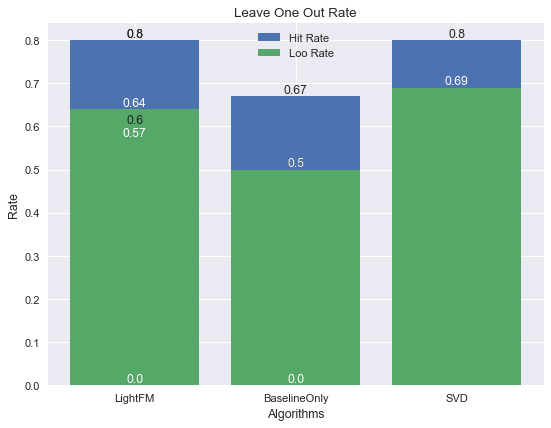

In [129]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.bar(x=loo['Algo'],height=loo['Hit_rate'],align='center',label='Hit Rate')
plt.bar(x=loo['Algo'],height=loo['LOO_Rate'],align='center',label='Loo Rate')
plt.title('Leave One Out Rate')
plt.xlabel('Algorithms')
plt.ylabel('Rate')
#annotation
y=loo['Hit_rate'].values
x=loo['Algo'].values
for a,b in zip(x,y): 
    plt.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom")
y=loo['LOO_Rate'].values
#loo rate annotation is in white
for a,b in zip(x,y): 
    plt.annotate(str(b),xy=(a,b),size=11,ha='center', va="bottom",color='white')    
plt.legend(loc='best');

 **Just by looking into the above graph, it is apparent that the Hit Rate has indeed improved, from 0.6 (LightFM best run), however it is not a valid result and one to take into account!** Remember we have tempered with the training set by removing the highest rated transaction from each customer's training data. Despite that, a leave one out rate of 0.69, by SVD, means that in  69% of the produced recommendations, the removed highest rated product, (which was hidden during training,) was picked to be in the Top N recommendations. **In other words, in 69% of the cases the system managed to detect the customer's "most liked" product and included it to the outputted recommendations.**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2fe6d7f1-e3b6-4a34-bfbd-cac6314bcb60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>